<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW4/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 4
##Owen Fabula
##Problem 2: R

##Reading in data
First, I read the data in to a frame from the raw csv file on GitHub.

In [1]:
#import Hmisc
install.packages("Hmisc")
library(Hmisc)
#reading in raw csv file
library(readr)
nutr <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




##Sorting by saturated_fat
To sort the dataset by the saturated_fat and get the top 5 food items by saturated fat, I used the following code:

In [11]:
#sort values
head(nutr[order(nutr$saturated_fat, decreasing=TRUE), 0:4], 5)

food item,weight_in_grams,saturated_fat,cholesterol
<chr>,<dbl>,<dbl>,<dbl>
CHEESECAKE 1 CAKE,1110,119.9,2053
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188,118.3,703
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108,92.0,609
CREME PIE 1 PIE,910,90.1,46
LARD 1 CUP,205,80.4,195


From the above output, we can see that the top five foods in terms of saturated fat are: cheesecake, ice cream, yellowcake, creme pie, and lard (descending order).<br /><br />There is something to be said on the validity of sorting food items of different sizes: since some foods listed are simply larger than other foods, it follows that the larger foods will probably have more saturated fat than smaller food. It may benefit us, then, to sort values proportionate to the size of the food.

##Creating the saturated_fat_per_gram column
To create the saturated_fat_per_gram column, I divided each value in saturated_fat by its corresponding weight_in_grams. The following code does this:

In [29]:
#scale saturated_fat and add to new col
nutr$saturated_fat_per_gram <- nutr$saturated_fat
#iterate through each value in the new column
count <- 1
for (x in nutr$saturated_fat_per_gram) {
  #set value = to saturated_fat / weight
  nutr$saturated_fat_per_gram[count] <- nutr$saturated_fat[count] / nutr$weight_in_grams[count]
  count <- count + 1 #inc count
}
#test if the above code worked
dex <- 11
cat("sat_fat per gram at index",dex,":",nutr$saturated_fat_per_gram[dex],"\nsaturated fat at index",dex,":",nutr$saturated_fat[dex],"\nweight at index",dex,":",nutr$weight_in_grams[dex])

sat_fat per gram at index 11 : 0.004395604 
saturated fat at index 11 : 0.4 
weight at index 11 : 91

To produce a list of the top 5 highest foods by saturated fat per gram, I used the following code:

In [30]:
#sort values
head(nutr[order(nutr$saturated_fat_per_gram, decreasing=TRUE), 0:5], 5)

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; SALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; UNSALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000


From the above output, we can see that there is actually a tie between 1 TBSP of salted and unsalted butter for the highest saturated fat per gram!!

##Standardizing saturated_fat_per_gram
To standardize saturated_fat_per_gram , I simply used the built-in scale function. I stored the calculated z-scores in a new column of the nutr dataframe.

In [32]:
#use R scale function
nutr$scaled_satfatgram <- scale(x=nutr$saturated_fat_per_gram)

To produce a list of high end outliers, I used the following code:

In [47]:
#count number of z-scores > 3
count <- 0
for (x in nutr$scaled_satfatgram) {
  if (x > 3) {
    count <- count + 1
  }
}
#sort dataframe by scaled_satfatgram; limit to amount of z-scores > 3
head(nutr[order(nutr$saturated_fat_per_gram, decreasing=TRUE), 0:6], count)

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_satfatgram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.5071429,7.106775
BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.5071429,7.106775
BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.5053097,7.079055
BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.5053097,7.079055
BUTTER; SALTED 1 PAT,5.00,2.5,11,0.5000000,6.998763
BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.5000000,6.998763
LARD 1 TBSP,13.00,5.1,12,0.3923077,5.370282
LARD 1 CUP,205.00,80.4,195,0.3921951,5.368580
IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.3500000,4.730522


From the above output, we can see that the highest end outliers are unsalted and salted butter, similar to the result of sorting saturated_fat_per_gram in descending order.<br /><br />To find the amount of values at the low end of the outliers, I used the following code:

In [48]:
#count amount of z-scores < -3
countLow <- 0
for (x in nutr$scaled_satfatgram) {
  if (x < -3) {
    countLow <- countLow + 1
  }
}
cat("num of z-score < -3:",countLow)

num of z-score < -3: 0

From the above output, we can see that there are no outliers on the low end for saturated_fat_per_gram.<br /><br />To make a density plot for saturated_fat_per_gram, I used the follwing code:

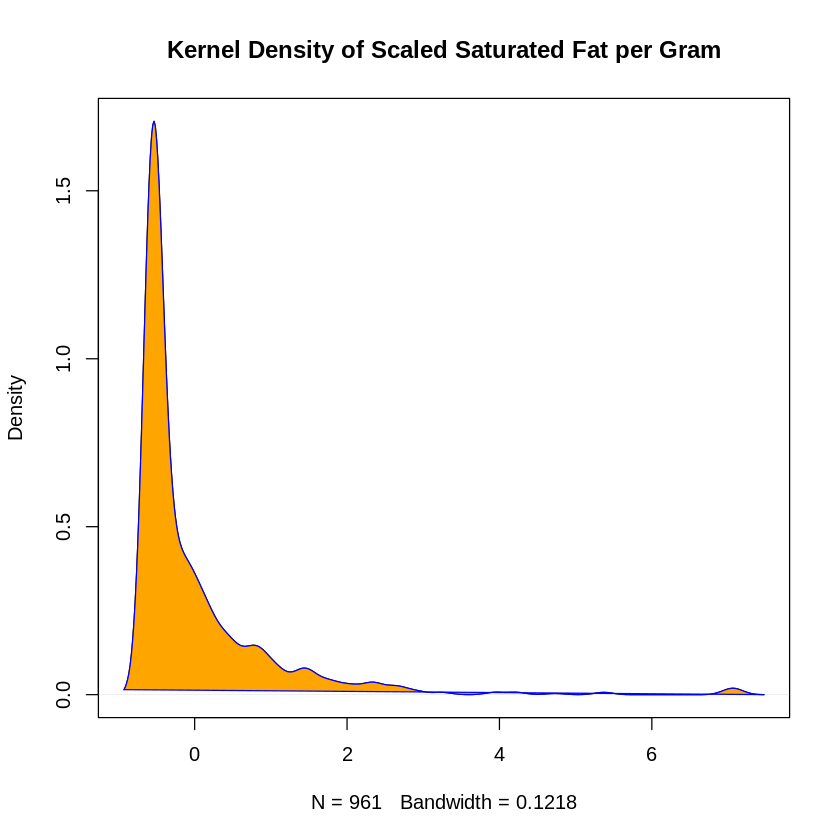

In [49]:
#make plot
# Kernel Density Plot
densityPlot <- density(nutr$scaled_satfatgram)

# plots the results
plot(densityPlot, main="Kernel Density of Scaled Saturated Fat per Gram")

# plots the results (filled)
polygon(densityPlot, col="orange", border="blue")

From the above output, we can see that there is a lot of density around the value 0, meaning that many foods in the original data set either have a very low or zero saturated fat per gram.

##Missing values
To find if there were any missing values, I used the following code:

In [63]:
#find na
cat("num na in dataframe:",sum(is.na(nutr)),"\n")

#look for other common placeholders
count <- 0 #num missing vals
ifelse(nutr$saturated_fat == "?" | nutr$saturated_fat == 9999, yes=count + 1, no=count + 0)
ifelse(nutr$weight_in_grams == "?" | nutr$weight_in_grams == 9999, yes=count + 1, no=count + 0)
ifelse(nutr$cholesterol == "?" | nutr$cholesterol == 9999, yes=count + 1, no=count + 0)
cat("num missing values in dataframe:",count)

num na in dataframe: 0 


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

num missing values in dataframe: 0

According to the above output, there are no NA values, nor are there any obvious placeholder values in the entire data frame. I also took the liberty of visually inspecting the original data set and did not find anything that would indicate a missing value. As such, there is no need to impute any columns with any other values.

##Standardizing the rest of the numeric columns
To standardize the rest of the numeric columns (which includes weight_in_grams and cholesterol), I followed a similar procedure to what I did for saturated_fat_per_gram. I first made a new column for each other numeric column; then I used the built in scale function to scale the original columns. The following code achieves the above:

In [72]:
#scale weight_in_grams
nutr$scaled_weight <- scale(x=nutr$weight_in_grams)
#scaled cholesterol
nutr$scaled_chol <- scale(x=nutr$cholesterol)

Then, I calculated the amount of outliers using the following code:

In [75]:
#find outliers for scaled_weight
outliers_weight <- ifelse(nutr$scaled_weight < -3 | nutr$scaled_weight > 3, yes=nutr$scaled_weight, no=NA)
cat("num z-scores < -3 or > 3:",sum(!is.na(outliers_weight)),"\n")
#find outliers for scaled_chol
outliers_cho <- ifelse(nutr$scaled_chol < -3 | nutr$scaled_chol > 3, yes=nutr$scaled_chol, no=NA)
cat("num z-scores < -3 or > 3:",sum(!is.na(outliers_cho)),"\n")

num z-scores < -3 or > 3: 22 
num z-scores < -3 or > 3: 17 


From the above output, we can see that there are 22 outliers in scaled_weight and 17 outliers in scaled_cho. So, yes, there are indeed outliers in the other numeric columns.

##Summary of the above
<ul><li>First, sorting the original data set by saturated fat revealed that the 5 foods with the highest saturated fat are cheesecake, ice cream, yellowcake, creme pie, and lard.</li><li>Then, the saturated_fat_per_gram column was calculated and sorted; it was found that 1 TBSP of salted and unsalted butter were tied for the highest saturated fat per gram.</li><li>Then, saturated_fat_per_gram was standardized according to z-score:<ul><li>There were 15 values that were outliers on the high end.</li><li>There were 0 values that were outliers on the low end.</li></ul></li><li>A density plot was made of saturated_fat_per_gram, and from that, it wa concluded that many values in that column were 0 or numerically near 0.</li><li>It was then determined that there were no missing values in the original data set due to the lack of any sort of NA or null values as well as the absence of placeholder values.</li><li>Finally, the other two numeric columns were scaled according to z-score; here is what was discovered from that:<ul><li>First, weight_in_grams had 22 outliers.</li><li>Second, cholesterol had 17 outliers.</li></ul></li></ul>